# Assignment 6
### Do Question 6, and three more questions of your choice.

### 1. Set review:

- Operations on sets (hints: sketch venn-type diagrams, and showing $A=B$ is the same as $A \subseteq B$ and $B \subseteq A$):
- $ (A \backslash B) \cup (A \cap B) = A $
- $ A \cup ( B \cap C) = (A \cup B) \cap (A \cup C)$
- $ A \backslash (B \cup C) = A\backslash B \cap A \backslash C $ and $A \backslash (B \cap C) = A \backslash B \cup A \backslash C$

- Plot the following sets: 
    - $A = \{x \in \mathbb{R}: x^2 -1 \ge 0 \}$ 
    - $B = \{ (x,y) \in \mathbb{R}^2: 3x -2y \ge 0 \}$
    - $C = \{ (x,y) \in \mathbb{R}^2: xy \ge 3 \}$
    - $D = \{ (x_1,x_2) \in \mathbb{R}^2: x_1 \ge 0, x_2 \ge 0, x_1 + x_2 \le 1 \}$
- The power set of $A$ is the set of all subsets of $A$, denoted $\mathcal{P}(A)$. What is the power set of $\{ 1, 2, 3 \}$? (Hint: The empty set is a subset of every set; the whole set is a subset of itself.)

### 2. Probability space basics:

- What are the outcomes for rolling a single, fair **THREE**-sided die? What's the set of all events? What are the probabilities of all the events?
- What about flipping a fair coin twice? (Hint: There are 4 outcomes, and $2^{4} = 16$ events.)
- What about rolling the **THREE**-sided die twice, and adding the results? Don't write down the set of all the possible events, but describe briefly what it looks like and how large it is. (Hint: There are 5 outcomes, and $2^{5}=32$ possible events.)

Obviously, a "three-sided die" doesn't exist, but this keeps you from spending a lot of time suffering in working out sets of events.

In [2]:
# 2a

import itertools

Omega = [1, 2, 3]
P = {w: 1/3 for w in Omega}

events = []
for r in range(len(Omega)+1):
    for subset in itertools.combinations(Omega, r):
        events.append(set(subset))

for E in events:
    prob = sum(P[w] for w in E)
    print(E, prob)

set() 0
{1} 0.3333333333333333
{2} 0.3333333333333333
{3} 0.3333333333333333
{1, 2} 0.6666666666666666
{1, 3} 0.6666666666666666
{2, 3} 0.6666666666666666
{1, 2, 3} 1.0


In [3]:
# 2b

Omega_2b = ["HH", "HT", "TH", "TT"]
P_2b = {w: 1/4 for w in Omega_2b}

events_2b = []
for r in range(len(Omega_2b) + 1):
    for subset in itertools.combinations(Omega_2b, r):
        events_2b.append(set(subset))

for E in events_2b:
    prob = sum(P_2b[w] for w in E)
    print(E, prob)


set() 0
{'HH'} 0.25
{'HT'} 0.25
{'TH'} 0.25
{'TT'} 0.25
{'HH', 'HT'} 0.5
{'HH', 'TH'} 0.5
{'HH', 'TT'} 0.5
{'TH', 'HT'} 0.5
{'TT', 'HT'} 0.5
{'TH', 'TT'} 0.5
{'HH', 'TH', 'HT'} 0.75
{'HH', 'TT', 'HT'} 0.75
{'HH', 'TH', 'TT'} 0.75
{'TH', 'TT', 'HT'} 0.75
{'HH', 'TH', 'TT', 'HT'} 1.0


#2c
    Rolling a three-sided die twice gives 9 total ordered outcomes, each equally likely with probability 1/9.
    If we define a random variable S = (first + second roll), then S can take values {2, 3, 4, 5, 6}.
    The probabilities are P(S = 2)=1/9, P(S = 3)=2/9, P(S = 4)=3/9, P(S = 5)=2/9, P(S = 6)=1/9.
    Altogether there are 32 possible events (subsets of {2, 3, 4, 5, 6}), for example “sum ≥ 5” = {5, 6} with probability 1/3.


### 3. Random Variable Basics

- Imagine rolling a fair single six-sided die. There are 6 outcomes, all equally likely. Derive the sample space and the space of events. What are the probabilities of the outcomes and events? 
- Consider a random variable that assigns the square root of the number of pips on the die to each outcome. Write code to simulate rolling a single six-sided die and computing the value of the random variable. Simulate 5000 rolls and plot the mass function and ECDF of the random variable.
- Imagine rolling two fair six-sided die. Consider a random variable that adds up the pips on the dice. There are 11 outcomes (2 , 3, ..., 12), but not all are equally likely. Derive the sample space and **describe** the space of events. What are the probabilities of the outcomes?
- Write code to simulate the random variable (rolling two six-sided die and adding the results together). Simulate 10000 rolls and plot the mass function and ECDF.

### 4. Roulette

This question will be easiest if you read the whole thing, and come up with a clear plan for how you'll write the code.

Roulette is a betting game. There are 37 possible outcomes: A green 0, and the numbers 1 to 36 in red and black. Here is a picture of the (American, not Euro, it has an extra green 00) betting board:

![Roulette](./src/euro_roulette.jpg)

To bet, you must pay a dollar, but then you get payouts that depend on how many slots are in your bet
- Basic bets:
    - Red or Black slots
    - Odd or Even slots
    - A single slots, like 20
- More complex bets:
    - Split: Two adjacent slots (e.g. {1,2})
    - Square: Four adjacent slots (e.g. {1,2,4,5})
    - Street: Three slots in a row (e.g. {1,2,3})
    - Line: Six slots (e.g. {1,2,3,4,5,6})
In general, you can only bet on 1, 2, 3, 4, 6 slots, 12 slots, or 18 slots. If your bet occurs when the wheel is spun, you gain 36/K-1 where $K$ is the number of slots you bet on; if not, you lose a dollar and get -1.

- Write code to model spinning the roulette wheel, including the colors and numbers (you could make two lists of number and color and draw a random number between 0 and 37... or use a dataframe with color and number variables and sample it... or use a dict with key to number/color pairs...)
- Describe the probability space associated with the roulette wheel: Outcomes, events, probabilities (If there are 37 outcomes, there are $2^{37}= 137,438,953,472$ events, by the way)
- You wrote code to generate a spin of the roulette wheel. Now write a function that takes a basic or complex bet as an argument, and returns the result for the player (win or lose, and the payout 36/K-1 or -1)
- Simulate betting on red, betting on odd, betting on 7, a split, and a line 1000 times each.
- Compute the average values for the bets you just simulated. What are the expected average payoffs?

In [4]:
import numpy as np
import pandas as pd

slots = ["0", "00"] + [str(i) for i in range(1, 37)]

red_numbers = {
    1,3,5,7,9,12,14,16,18,19,21,23,25,27,30,32,34,36
}

def color_of(slot):
    if slot in ["0", "00"]:
        return "green"
    n = int(slot)
    return "red" if n in red_numbers else "black"

def parity_of(slot):
    if slot in ["0", "00"]:
        return "none"
    n = int(slot)
    return "odd" if n % 2 == 1 else "even"

wheel = pd.DataFrame({
    "slot": slots,
    "color": [color_of(s) for s in slots],
    "parity": [parity_of(s) for s in slots]
})

wheel.head()


,slot,color,parity
0,0,green,none
1,00,green,none
2,1,red,odd
3,2,black,even
4,3,red,odd


In [5]:
rng = np.random.default_rng(123)

def spin_wheel():
    return rng.choice(wheel["slot"].values)


There are 38 outcomes with a 1/38 equal chance to hit any of the 38 outcomes {0, 00, 1, 2, etc...}. The subset of all events is 2^38.

In [6]:
# Betting model and payoff function
def bet_on_set(outcome, slots_bet_on):
    """
    outcome: a string in {"0","00","1",...,"36"}
    slots_bet_on: iterable of slot strings
    returns net payoff for this single bet
    """
    K = len(slots_bet_on)
    if outcome in slots_bet_on:
        return 36.0 / K - 1.0
    else:
        return -1.0


In [7]:
# Define some standard bets:
red_set   = set(wheel.loc[wheel["color"] == "red",  "slot"])
odd_set   = set(wheel.loc[wheel["parity"] == "odd", "slot"])
single_7  = {"7"}
split_1_2 = {"1", "2"}
line_1_6  = {"1", "2", "3", "4", "5", "6"}

In [8]:
# Simulate each bet 1000 times
def simulate_bet(slot_set, n_sim=1000):
    payoffs = []
    for _ in range(n_sim):
        outcome = spin_wheel()
        payoffs.append(bet_on_set(outcome, slot_set))
    return np.array(payoffs)

n_sim = 1000
pay_red   = simulate_bet(red_set,   n_sim)
pay_odd   = simulate_bet(odd_set,   n_sim)
pay_7     = simulate_bet(single_7,  n_sim)
pay_split = simulate_bet(split_1_2, n_sim)
pay_line  = simulate_bet(line_1_6,  n_sim)

print("Average payoff betting red:   ", pay_red.mean())
print("Average payoff betting odd:   ", pay_odd.mean())
print("Average payoff betting 7:     ", pay_7.mean())
print("Average payoff split {1,2}:   ", pay_split.mean())
print("Average payoff line {1..6}:  ", pay_line.mean())


Average payoff betting red:    -0.046
Average payoff betting odd:    -0.08
Average payoff betting 7:      0.008
Average payoff split {1,2}:    -0.136
Average payoff line {1..6}:   -0.04


Because there are now 38 slots but payouts are still based on “36-to-1” odds, the expected value of each bet is negative (roughly 
−2/38 per $1 bet in theory). The simulated average payoffs for all five bet types are close to this negative value, showing that American roulette is a losing game for the player in the long run.

### 5. CDF and PDF Basics

- Verify the following functions are distribution functions and compute their density functions. Plot the distribution and density.

1. $F(x) = \begin{cases}
0, & x \le 0 \\
\sqrt{x}, & 0 \le x \le 1 \\
1, & x \ge 1 
\end{cases}
$
2. $F(x) = \dfrac{1}{1+e^{-x}}$
3. For $ a < b < c$,
$
F(x) = \begin{cases}
0, & x \le 0 \\
\frac{(x-a)^2}{(b-a)(b-c)}, & a \le x \le c \\
1 - \frac{(b-x)^2}{(b-a)(b-c)}, & c < x < b \\
1, & x \ge b
\end{cases}
$
4. $ F(x) = \begin{cases}
0, & x <0 \\
1 - e^{-x}, & x>0
\end{cases}
$
5. $ F(x) = \begin{cases}
0, & x \le 0 \\
x, & 0 < x < 1\\
1, & x \ge 1
\end{cases}
$

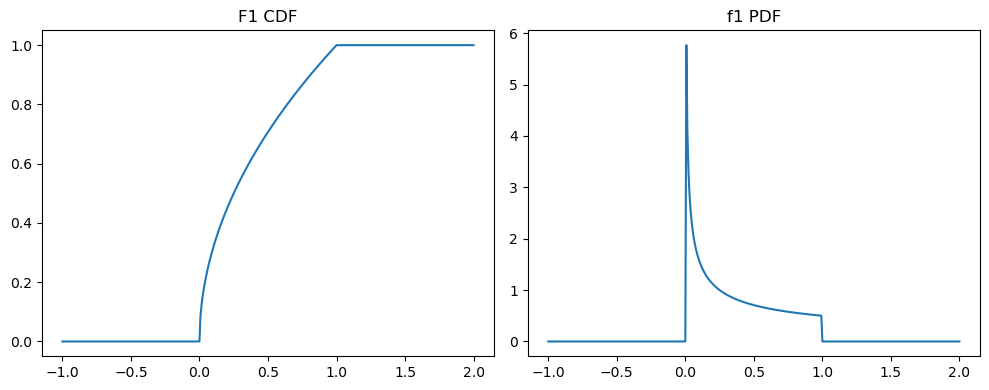

In [9]:
# 5a
import matplotlib.pyplot as plt

grid = np.linspace(-1, 2, 400)

def F1(x):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    mask1 = (x > 0) & (x < 1)
    mask2 = (x >= 1)
    out[mask1] = np.sqrt(x[mask1])
    out[mask2] = 1.0
    return out

def f1(x):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    mask = (x > 0) & (x < 1)
    out[mask] = 1.0 / (2*np.sqrt(x[mask]))
    return out

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(grid, F1(grid)); plt.title("F1 CDF")
plt.subplot(1,2,2); plt.plot(grid, f1(grid)); plt.title("f1 PDF")
plt.tight_layout()
plt.show()


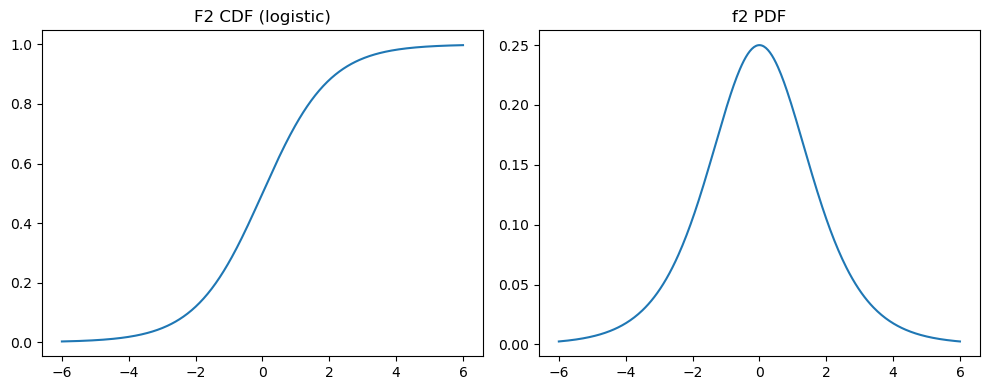

In [10]:
#5b

def F2(x):
    x = np.asarray(x)
    return 1.0 / (1.0 + np.exp(-x))

def f2(x):
    x = np.asarray(x)
    ex = np.exp(-x)
    return ex / (1.0 + ex)**2

grid = np.linspace(-6, 6, 400)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(grid, F2(grid)); plt.title("F2 CDF (logistic)")
plt.subplot(1,2,2); plt.plot(grid, f2(grid)); plt.title("f2 PDF")
plt.tight_layout()
plt.show()


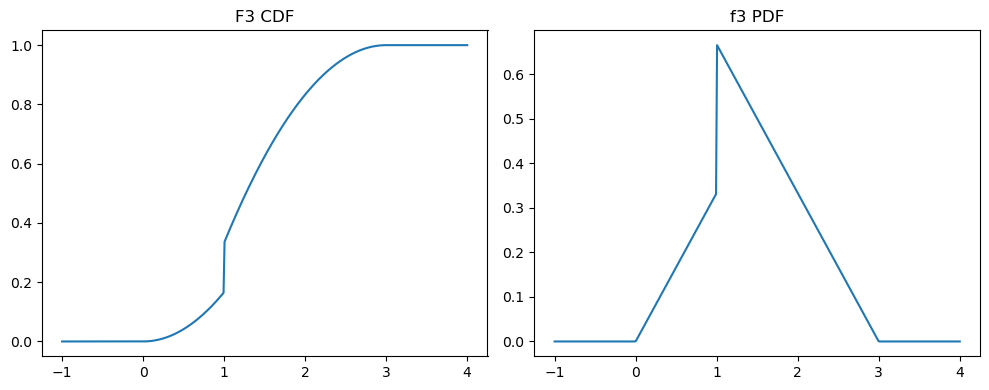

In [11]:
# 5c

a, c, b = 0.0, 1.0, 3.0
grid = np.linspace(-1, 4, 400)

def F3(x):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    mask1 = (x >= a) & (x <= c)
    mask2 = (x > c) & (x < b)
    mask3 = (x >= b)
    out[mask1] = (x[mask1]-a)**2 / ((b-a)*(b-c))
    out[mask2] = 1 - (b-x[mask2])**2 / ((b-a)*(b-c))
    out[mask3] = 1.0
    return out

def f3(x):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    mask1 = (x > a) & (x < c)
    mask2 = (x > c) & (x < b)
    out[mask1] = 2*(x[mask1]-a)/((b-a)*(b-c))
    out[mask2] = 2*(b-x[mask2])/((b-a)*(b-c))
    return out

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(grid, F3(grid)); plt.title("F3 CDF")
plt.subplot(1,2,2); plt.plot(grid, f3(grid)); plt.title("f3 PDF")
plt.tight_layout()
plt.show()


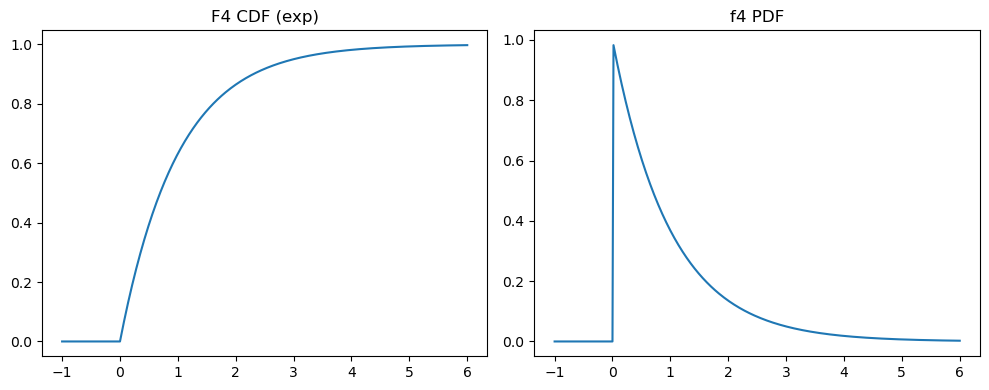

In [12]:
#5d

def F4(x):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    mask = (x > 0)
    out[mask] = 1 - np.exp(-x[mask])
    return out

def f4(x):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    mask = (x > 0)
    out[mask] = np.exp(-x[mask])
    return out

grid = np.linspace(-1, 6, 400)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(grid, F4(grid)); plt.title("F4 CDF (exp)")
plt.subplot(1,2,2); plt.plot(grid, f4(grid)); plt.title("f4 PDF")
plt.tight_layout()
plt.show()


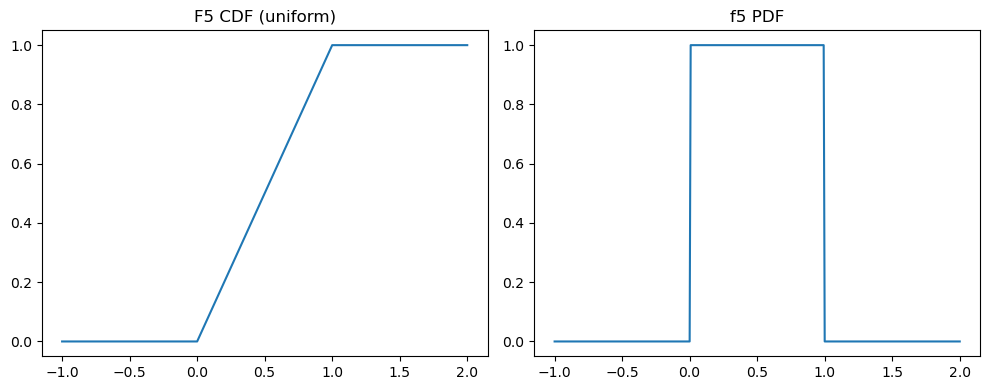

In [13]:
# 5e

def F5(x):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    mask1 = (x > 0) & (x < 1)
    mask2 = (x >= 1)
    out[mask1] = x[mask1]
    out[mask2] = 1.0
    return out

def f5(x):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    mask = (x > 0) & (x < 1)
    out[mask] = 1.0
    return out

grid = np.linspace(-1, 2, 400)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(grid, F5(grid)); plt.title("F5 CDF (uniform)")
plt.subplot(1,2,2); plt.plot(grid, f5(grid)); plt.title("f5 PDF")
plt.tight_layout()
plt.show()


### 6. Some Common Distributions

For the following distributions:
- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data

You can use https://docs.scipy.org/doc/scipy/reference/stats.html to generate values for the pdf/cdf and generate samples of random variates.


- Logistic distribution (similar to normal): 
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} 
$$
with $\sigma >0$.
- Exponential distribution (similar to log-normal):
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}
$$
with $\lambda > 0$.
- Negative Binomial (similar to Poisson): The probability mass function for positive integers is:
$$
f(k;r,p) = \dfrac{(k+r-1)!}{k!(r-1)!}(1-p)^k p^r, \quad \text{ for $k=0,...n$}
$$
You can interpret this as follows: Flip a coin that comes up heads with probability $p$ until you get $r$ heads, and then stop. What is the probability of stopping at each $k=0,1,2,...$?
- Categorical (similar to Bernoulli): The probability mass function over $k = 1, 2, ..., K$ categories is
$$
f(k;p_1,...,p_K) = p_1^{k=1}p_2^{k=2}...p_K^{k=K}
$$
where $0 \le p_i \le 1$ and $ \sum_{k=1}^K p_k = 1$.


In [14]:
import seaborn as sns
import scipy.stats as stats

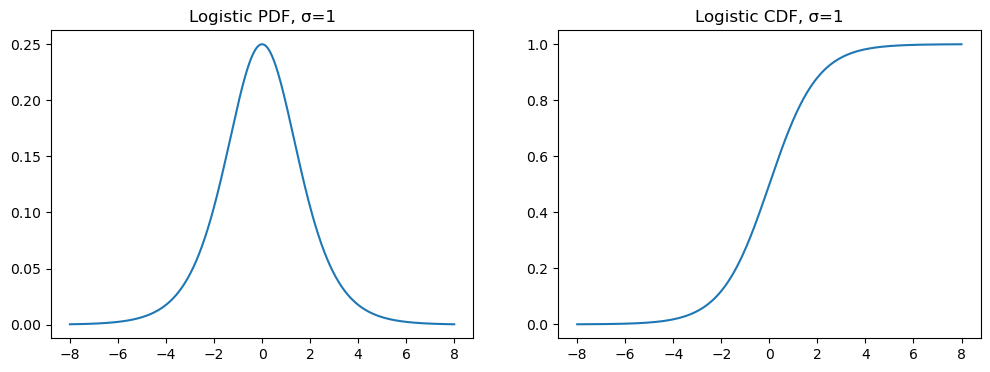

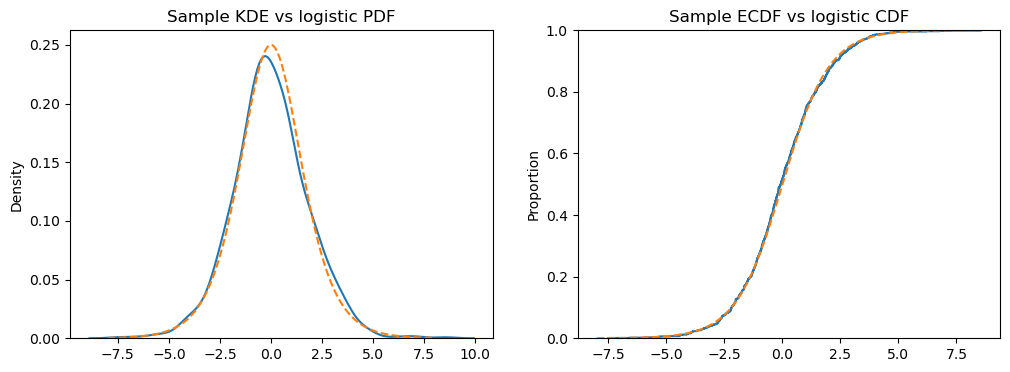

In [15]:
sigma = 1.0
grid = np.linspace(-8, 8, 400)

pdf_log = stats.logistic(scale=sigma).pdf(grid)
cdf_log = stats.logistic(scale=sigma).cdf(grid)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].plot(grid, pdf_log)
axes[0].set_title("Logistic PDF, σ=1")
axes[1].plot(grid, cdf_log)
axes[1].set_title("Logistic CDF, σ=1")
plt.show()

sample_log = stats.logistic(scale=sigma).rvs(size=1000, random_state=0)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.kdeplot(sample_log, ax=axes[0])
axes[0].plot(grid, pdf_log, linestyle='--')
axes[0].set_title("Sample KDE vs logistic PDF")

sns.ecdfplot(sample_log, ax=axes[1])
axes[1].plot(grid, cdf_log, linestyle='--')
axes[1].set_title("Sample ECDF vs logistic CDF")
plt.show()


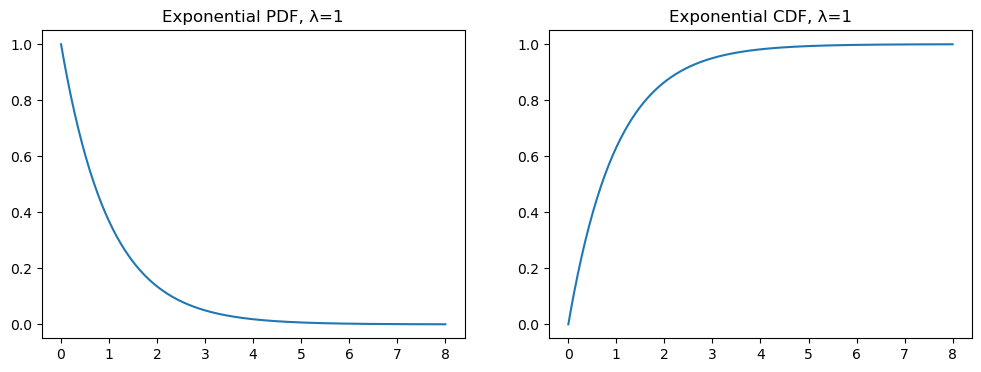

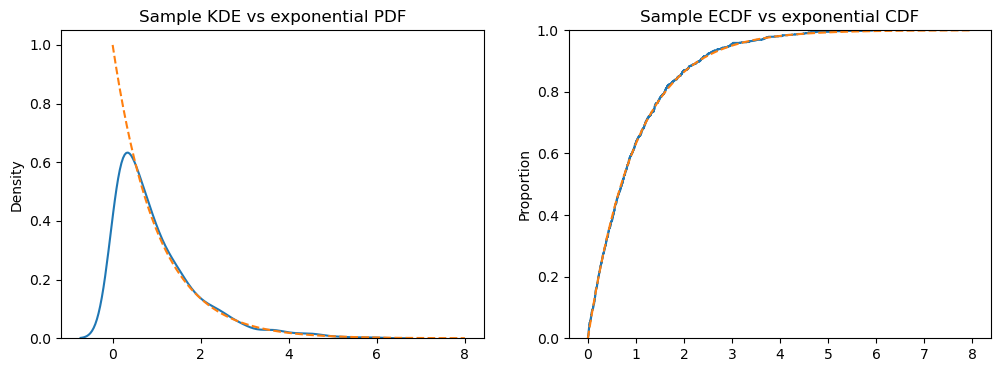

In [16]:
lam = 1.0
grid = np.linspace(0, 8, 400)

pdf_exp = stats.expon(scale=1/lam).pdf(grid)
cdf_exp = stats.expon(scale=1/lam).cdf(grid)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].plot(grid, pdf_exp); axes[0].set_title("Exponential PDF, λ=1")
axes[1].plot(grid, cdf_exp); axes[1].set_title("Exponential CDF, λ=1")
plt.show()

sample_exp = stats.expon(scale=1/lam).rvs(size=1000, random_state=1)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.kdeplot(sample_exp, ax=axes[0])
axes[0].plot(grid, pdf_exp, linestyle='--')
axes[0].set_title("Sample KDE vs exponential PDF")

sns.ecdfplot(sample_exp, ax=axes[1])
axes[1].plot(grid, cdf_exp, linestyle='--')
axes[1].set_title("Sample ECDF vs exponential CDF")
plt.show()


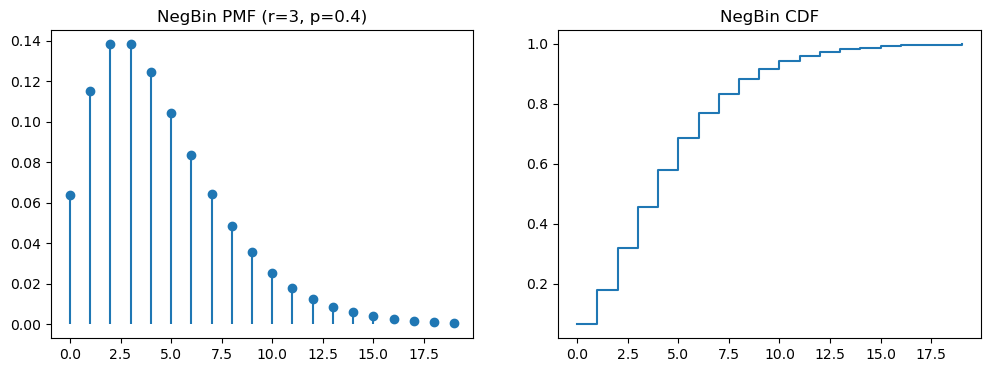

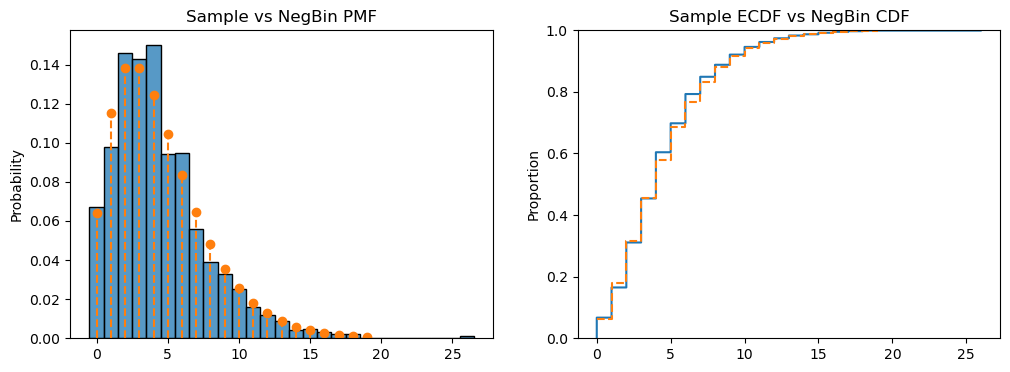

In [ ]:
r, p = 3, 0.4  
k_vals = np.arange(0, 20)

pmf_nb = stats.nbinom(n=r, p=p).pmf(k_vals)
cdf_nb = stats.nbinom(n=r, p=p).cdf(k_vals)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].stem(k_vals, pmf_nb, basefmt=" ")
axes[0].set_title("NegBin PMF (r=3, p=0.4)")
axes[1].step(k_vals, cdf_nb, where='post')
axes[1].set_title("NegBin CDF")
plt.show()

sample_nb = stats.nbinom(n=r, p=p).rvs(size=1000, random_state=2)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(sample_nb, stat='probability', discrete=True, ax=axes[0])
axes[0].stem(k_vals, pmf_nb, linefmt='C1--', markerfmt='C1o', basefmt=" ")
axes[0].set_title("Sample vs NegBin PMF")

sns.ecdfplot(sample_nb, ax=axes[1])
axes[1].step(k_vals, cdf_nb, where='post', linestyle='--')
axes[1].set_title("Sample ECDF vs NegBin CDF")
plt.show()


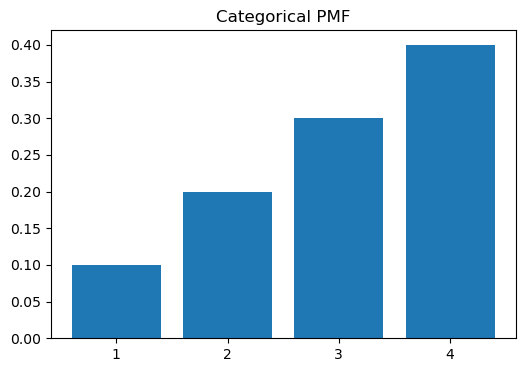

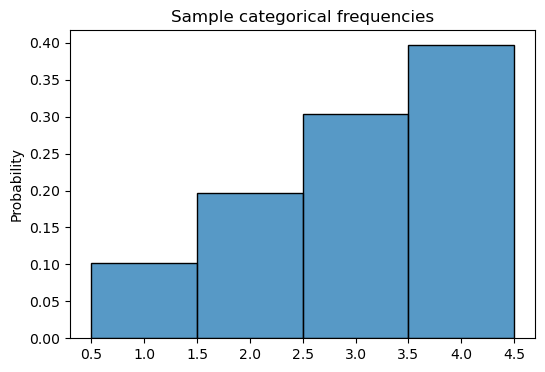

In [18]:
p = np.array([0.1, 0.2, 0.3, 0.4])
p = p / p.sum()
K = len(p)
cats = np.arange(1, K+1)

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(cats, p)
ax.set_xticks(cats)
ax.set_title("Categorical PMF")
plt.show()

# sample
rng = np.random.default_rng(3)
sample_cat = rng.choice(cats, size=1000, p=p)

fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(sample_cat, discrete=True, stat='probability', ax=ax)
ax.set_title("Sample categorical frequencies")
plt.show()
